<a href="https://colab.research.google.com/github/Shahid-Ali-Khan-099/Programming-for-AI/blob/main/Copy_of_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Contents**
*   Importing Libraries
*   Data Understanding
*   Data Preparation
*   Data Imputation

## Import Libraries
Let's import some libraries to get started!

In [7]:
import pandas as pd
import seaborn as sns

In [8]:
titanic = sns.load_dataset('titanic')
#titanic.to_csv('titanic.csv')

## Data Understanding

*   Dataframe shape
*   Head and Tail
*   Data Types
*   Describe

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [9]:
train = pd.read_csv('titanic.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

In [ ]:
train = titanic

In [ ]:
train.shape

In [ ]:
train.head()

In [ ]:
train.columns

In [ ]:
train.dtypes

In [ ]:
train.describe()

In [ ]:
train.nunique()

In [ ]:
train['Sex'].unique()

##Feature Understanding

*   Plotting Feature Distributions

  *   Barchart (Categorical Data)
  *   Histogram (Numerical Data)
  *   Boxplot (Numerical Data)

Let's check the frequency of survived and not survived people in the dataset.

In [ ]:
sns.countplot(x='Survived',data=train,palette='rainbow')

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='rainbow')

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [ ]:
sns.countplot(x='SibSp',data=train,palette='rainbow')

In [ ]:
sns.histplot(train['Age'])

In [ ]:
train['Fare'].hist(color='green', figsize=(8,4))

In [ ]:
sns.histplot(train['Age'])

In [ ]:
sns.boxplot(y='Age', x='Pclass', data=train)

In [ ]:
sns.boxplot(y='Age', data=train)

# **Outlier Removal**

In [ ]:
#train=train[train['Age'] < 66]

In [ ]:
#sns.boxplot(y='Age', data=train)

##Data Preparation

*   Dropping irrelevant columns and rows
*   Handling Missing Values
*   Identifying duplicated columns
*   Renaming Columns


Let's begin some exploratory data analysis! We'll start by dropping irrelevant columns

In [ ]:
train.drop(['Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train.shape

In [ ]:
train.columns

In [ ]:
train.head()

## Data Imputation
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

In [ ]:
train.isnull().sum()

In [ ]:
train.isnull()

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.head()

In [ ]:
#sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
mean_values = train.groupby('Pclass')['Age'].mean()
print(mean_values)

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Identifying Duplicated Columns**

In [ ]:
train.loc[train.duplicated()]

In [ ]:
train.loc[train.duplicated(subset=['Pclass'])]

In [ ]:
# Checking an example duplicate
train.query('Age == 1')

##Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
train.info()

In [ ]:
sex = pd.get_dummies(train['Sex'],dtype=int)

In [ ]:
train.head()

In [ ]:
train = pd.concat([train,sex],axis=1)

In [ ]:
train.head()

In [ ]:
train.drop(['Sex'],axis=1,inplace=True)

In [ ]:
train.head()

In [ ]:
train = train.rename(columns={'male':'Male'})

In [ ]:
train.head()

In [ ]:
train.info()

# Lab Task

Perform the steps mentioned above on the following datasete

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [10]:
import pandas as pd

In [11]:
import seaborn as sns

In [12]:
pd = pd.read_csv('heart_2020.csv')

In [13]:
pd.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [15]:
pd.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
239626,False
239627,False
239628,False
239629,False


In [16]:
pd.isnull().sum()

,0
HeartDisease,0
BMI,1
Smoking,1
AlcoholDrinking,1
Stroke,1
PhysicalHealth,1
MentalHealth,1
DiffWalking,1
Sex,1
AgeCategory,1


In [17]:
pd.shape

(239631, 18)

In [18]:
pd.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [19]:
pd.dtypes

,0
HeartDisease,object
BMI,float64
Smoking,object
AlcoholDrinking,object
Stroke,object
PhysicalHealth,float64
MentalHealth,float64
DiffWalking,object
Sex,object
AgeCategory,object


In [20]:
pd.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,239630.000000,239630.000000,239630.000000,239630.000000
mean,28.307301,3.336861,3.899904,7.103347
std,6.357903,7.912457,7.945550,1.437275
min,12.020000,0.000000,0.000000,1.000000
25%,24.010000,0.000000,0.000000,6.000000
50%,27.320000,0.000000,0.000000,7.000000
75%,31.380000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [24]:
pd.nunique()

,0
HeartDisease,3
BMI,3368
Smoking,2
AlcoholDrinking,2
Stroke,2
PhysicalHealth,31
MentalHealth,31
DiffWalking,2
Sex,2
AgeCategory,13


In [25]:
pd['Sex'].unique()

array(['Female', 'Male', nan], dtype=object)

In [26]:
pd.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


<ipython-input-28-b319f3efff64>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SkinCancer',data=pd,palette='rainbow')


<Axes: xlabel='SkinCancer', ylabel='count'>

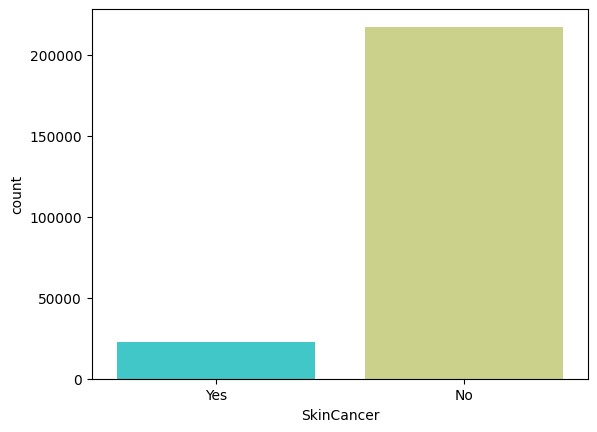

In [28]:
sns.countplot(x='SkinCancer',data=pd,palette='rainbow')

<Axes: xlabel='SkinCancer', ylabel='count'>

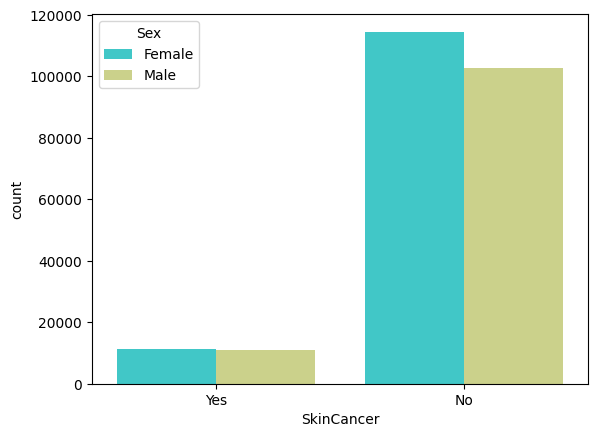

In [29]:
sns.countplot(x='SkinCancer',hue='Sex',data=pd,palette='rainbow')

<Axes: xlabel='SkinCancer', ylabel='count'>

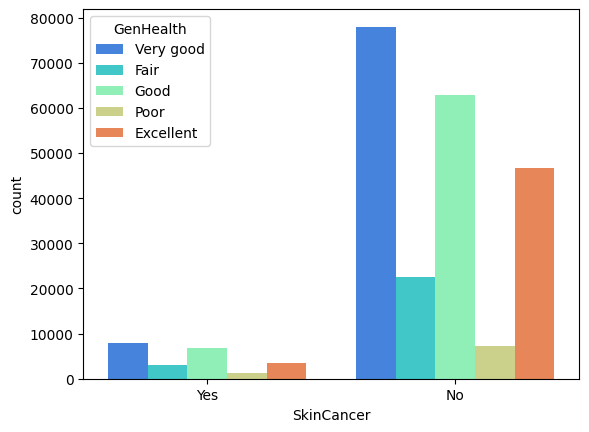

In [32]:
sns.countplot(x='SkinCancer',hue='GenHealth',data=pd,palette='rainbow')

<Axes: xlabel='SleepTime', ylabel='Count'>

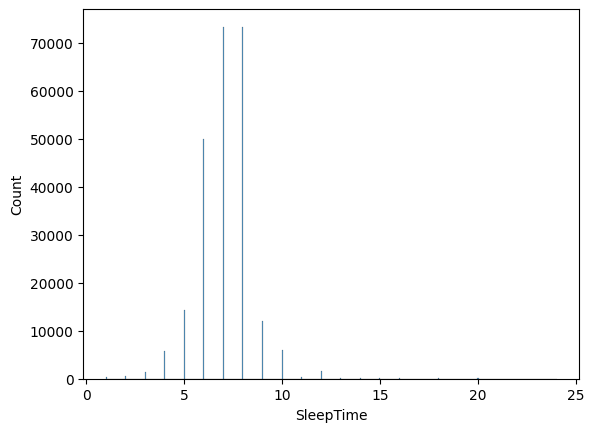

In [35]:
sns.histplot(pd['SleepTime'])

<Axes: xlabel='Sex', ylabel='AgeCategory'>

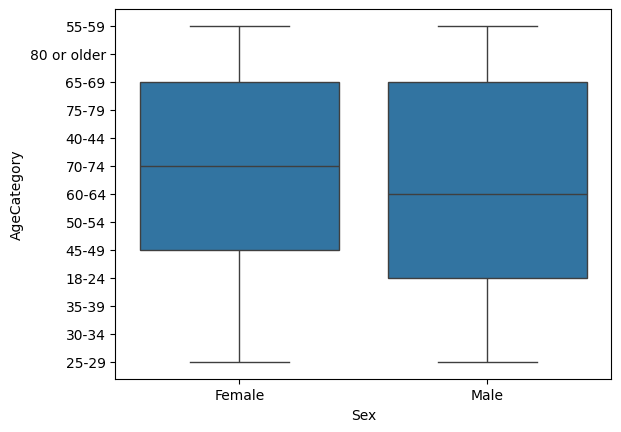

In [37]:
sns.boxplot(y='AgeCategory', x='Sex', data=pd)

<Axes: ylabel='AgeCategory'>

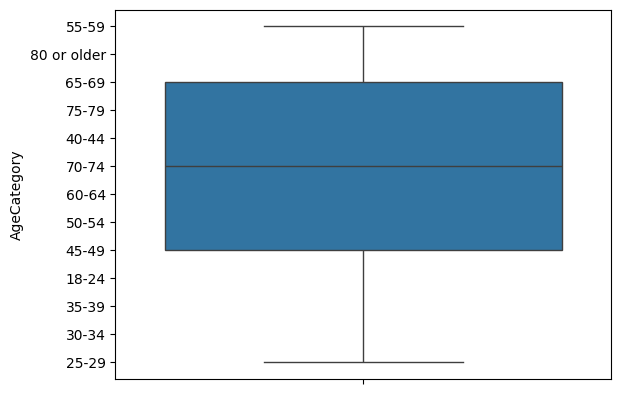

In [39]:
sns.boxplot(y='AgeCategory', data=pd)

In [43]:
pd.isnull().sum()

,0
HeartDisease,0
BMI,1
Smoking,1
AlcoholDrinking,1
Stroke,1
PhysicalHealth,1
MentalHealth,1
DiffWalking,1
AgeCategory,1
Race,1


In [42]:
pd.drop('Sex',axis=1,inplace=True)

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'